# COVID-19 Data Analysis

This is a data analysis notebook for the COVID-19 pandemic. It's based on data collected as of Mar-28-2020 by <a href='https://github.com/CSSEGISandData/COVID-19'>John Hopkins University</a> for educational purposes and research use.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from matplotlib.pyplot import figure
import seaborn as sns

In [3]:
#Function to get the growth rate of different status
def get_growth_rate(data):
    data = data.reshape(-1,)
    data_shifted = data[1:]
    change = data_shifted - data[:-1]
    del_Nd = change[1:]
    del_Nd_ = change[:-1]
    out = np.divide(del_Nd,del_Nd_)#,out=np.zeros_like(del_Nd), where=del_Nd_!=0)
    for i in range(out.shape[0]):
        if str(out[i]) in ('nan','inf'):
            out[i] = 0
    return out

## 1. Data Import:
    The first data is of daily report for the date '03/28/20'. It contains data about confirmed, recovered and fatal cases due to COVID-19. 
    Then follows the data related to daily cases of all three states, i.e, confirmed, recovered and fatal.

In [4]:
data = pd.read_csv('Data/CSSE_COVID19.csv')
print(data.head())
print(data.info())

#This is the time series data since 1/22/20 till 3/28/20
ts_c = pd.read_csv('Data/TSConfirm.csv')
ts_d = pd.read_csv('Data/TSDeath.csv')
ts_r = pd.read_csv('Data/TSRecover.csv')

      FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-03-28 23:05:37   
1  22001.0     Acadia       Louisiana             US  2020-03-28 23:05:37   
2  51001.0   Accomack        Virginia             US  2020-03-28 23:05:37   
3  16001.0        Ada           Idaho             US  2020-03-28 23:05:37   
4  19001.0      Adair            Iowa             US  2020-03-28 23:05:37   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          3       0          0       0   
1  30.295065  -92.414197          9       1          0       0   
2  37.767072  -75.632346          2       0          0       0   
3  43.452658 -116.241552         76       0          0       0   
4  41.330756  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  


## 2. Visualization of Affected Areas across the World

    The data is dense for USA with over 3178 provinces covered, and parts of China with 33 provinces and Canada with 15, but for most of the world, the data isn't dense enough, as can be seen below.

In [5]:
data.groupby('Country_Region').agg({'Province_State':['count']}).sort_values(by=[('Province_State','count')], ascending=False)[:10]

,Province_State
,count
Country_Region,
US,3178
China,33
Canada,15
United Kingdom,9
France,9
Australia,8
Netherlands,3
Denmark,2


    This here, is the representation of spread of disease accross the world. Wherever it seems that the spread is scarce, its cause of the fact that the data is given in cumulative form for entire Region/Country. Actual numbers differ vastly.

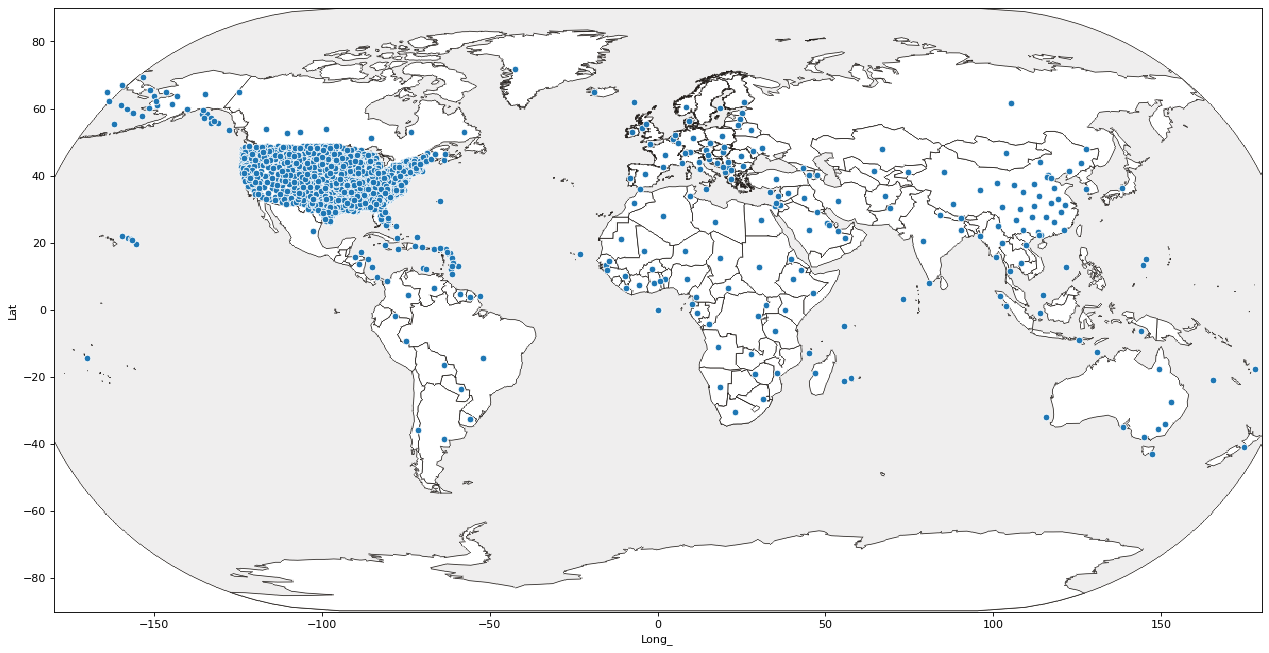

In [6]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
mp = mpimg.imread('Data/WorldMap.gif')
sp = sns.scatterplot(data['Long_'],data['Lat'])
plt.imshow(mp, zorder=0, extent=[-190, 190, -90, 90])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## 3. Correlation Plot
    Correlation gives the relation between various factors included in the dataset.It's range is [-1,1].
    
    For simple understanding, the lighter the shade of yellow, the more there is positive correlation, meaning change in one factor resuts in direct change in the other, and the darker the shade of purple, more the negative correlation, meaning that change in one of the factor, results in inverse change in the other.

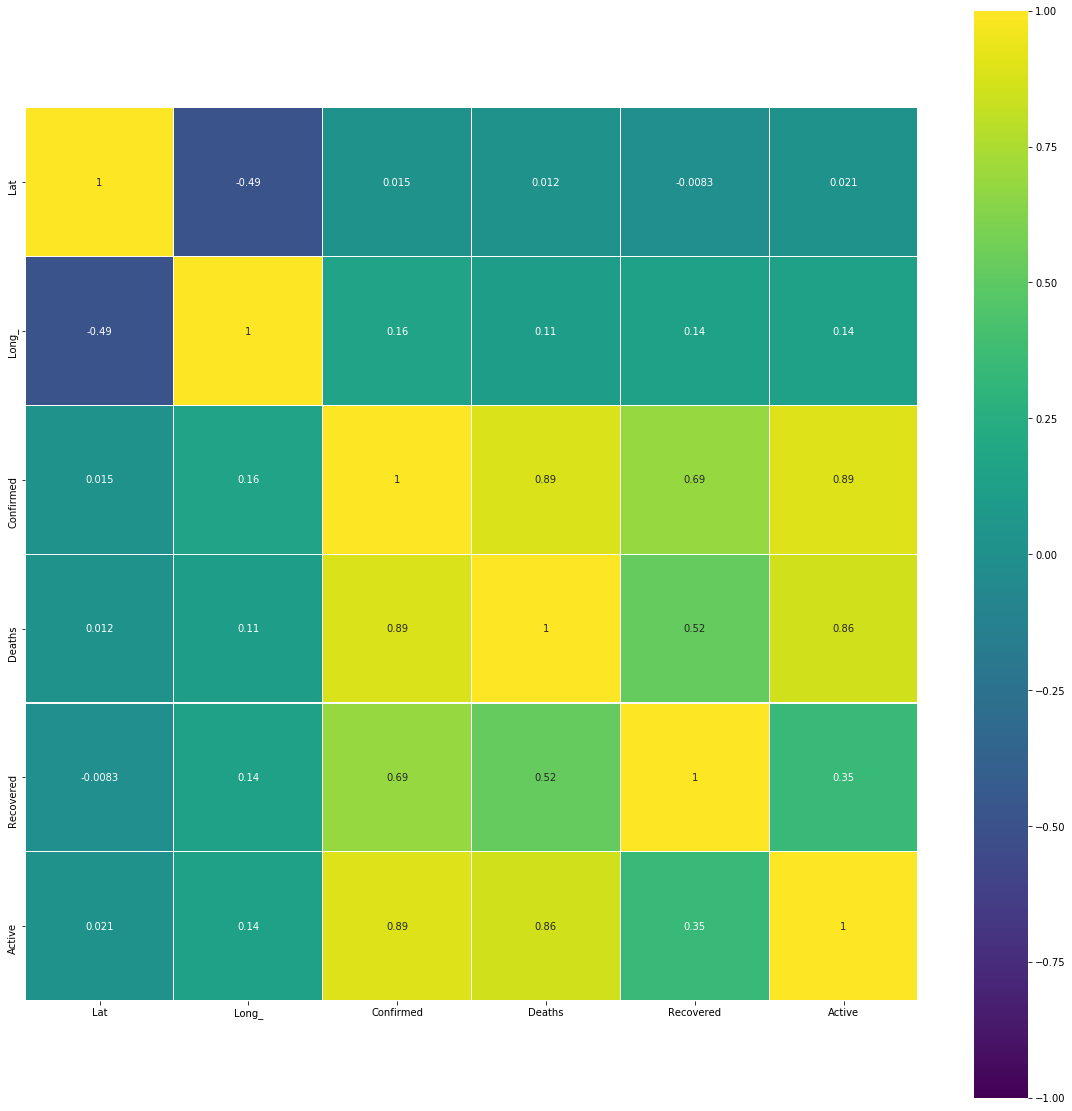

In [7]:
# figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
corr = data.loc[:, ~data.columns.isin(['FIPS'])].corr()
# sns.heatmap(corr)
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(corr,
           cmap = 'viridis', vmax=1.0, vmin=-1, linewidths=0.1,
           annot=True, annot_kws={'size':10}, square=True,ax=ax)


    Here, it can been seen that there is strong correlation between following factors:

<table style="font-size:110%;">
        <tr>
            <th> Factors </th>
            <th> Type </th>
            <th> Value </th>
        </tr>
        <tr>
            <td> (Confirmed, Active) </td>
            <td> Positive </td>
            <td> 0.89 <td>
        </tr>
        <tr>
            <td> (Confirmed, Recovered) </td>
            <td> Positive </td>
            <td> 0.69 <td>
        </tr>
        <tr>
            <td> (Confirmed, Deaths) </td>
            <td> Positive </td>
            <td> 0.89 <td>
        </tr>
        <tr>
            <td> (Recovered, Active) </td>
            <td> Positive </td>
            <td> 0.35 <td>
        </tr>
        <tr>
            <td> (Deaths, Active) </td>
            <td> Positive </td>
            <td> 0.86 <td>
        </tr>
    </table>

    It is observed that, for the data collected over different regions of the world, the correlation for both Confirmed as well as Active cases to Deaths is more than that to Recovered.

## 4. Data By Country

In [8]:
#Data by country
data_by_country_confirm = data.groupby('Country_Region').agg({'Confirmed':['sum']})
data_by_country_deaths = data.groupby('Country_Region').agg({'Deaths':['sum']})
perc_deaths = (data_by_country_deaths[('Deaths', 'sum')]/data_by_country_confirm[('Confirmed', 'sum')]) * 100

In [9]:
print('The countries that have the most number of confirmed cases are:\n')
print(data_by_country_confirm.sort_values(by=[('Confirmed', 'sum')],ascending=False)[:10])
print('\n\n')
print("The countries with most fatalities are:\n")
print(data_by_country_deaths.sort_values(by=[('Deaths', 'sum')],ascending=False)[:10])
print('\n\n')
print('Countries that have the most deaths, percentage-wise:\n')
print(perc_deaths.sort_values(ascending = False)[:10])

The countries that have the most number of confirmed cases are:

               Confirmed
                     sum
Country_Region          
US                121478
Italy              92472
China              81999
Spain              73235
Germany            57695
France             38105
Iran               35408
United Kingdom     17312
Switzerland        14076
Netherlands         9819



The countries with most fatalities are:

               Deaths
                  sum
Country_Region       
Italy           10023
Spain            5982
China            3299
Iran             2517
France           2317
US               2026
United Kingdom   1021
Netherlands       640
Germany           433
Belgium           353



Countries that have the most deaths, percentage-wise:

Country_Region
Gambia        33.333333
Nicaragua     25.000000
Cabo Verde    20.000000
Sudan         20.000000
Gabon         14.285714
Zimbabwe      14.285714
Guyana        12.500000
Italy         10.838957
Bangladesh    1


    As visible, right now, US is hit worst by the crisis with most confirmed cases, but it's just one way to look at things. When we look at the number of deaths, Italy, Spain and Iran, along with the epicenter China top the list, which is concerning for all the valid reasons.
    
    
    Another perspective to it is the percentage of people who were found positive for the virus, and died. When we take a look at that, we find, counties like Bangladesh, Sudan, Gambia are hit as worse as Italy is. The barplot here shows comparisions between different countries.

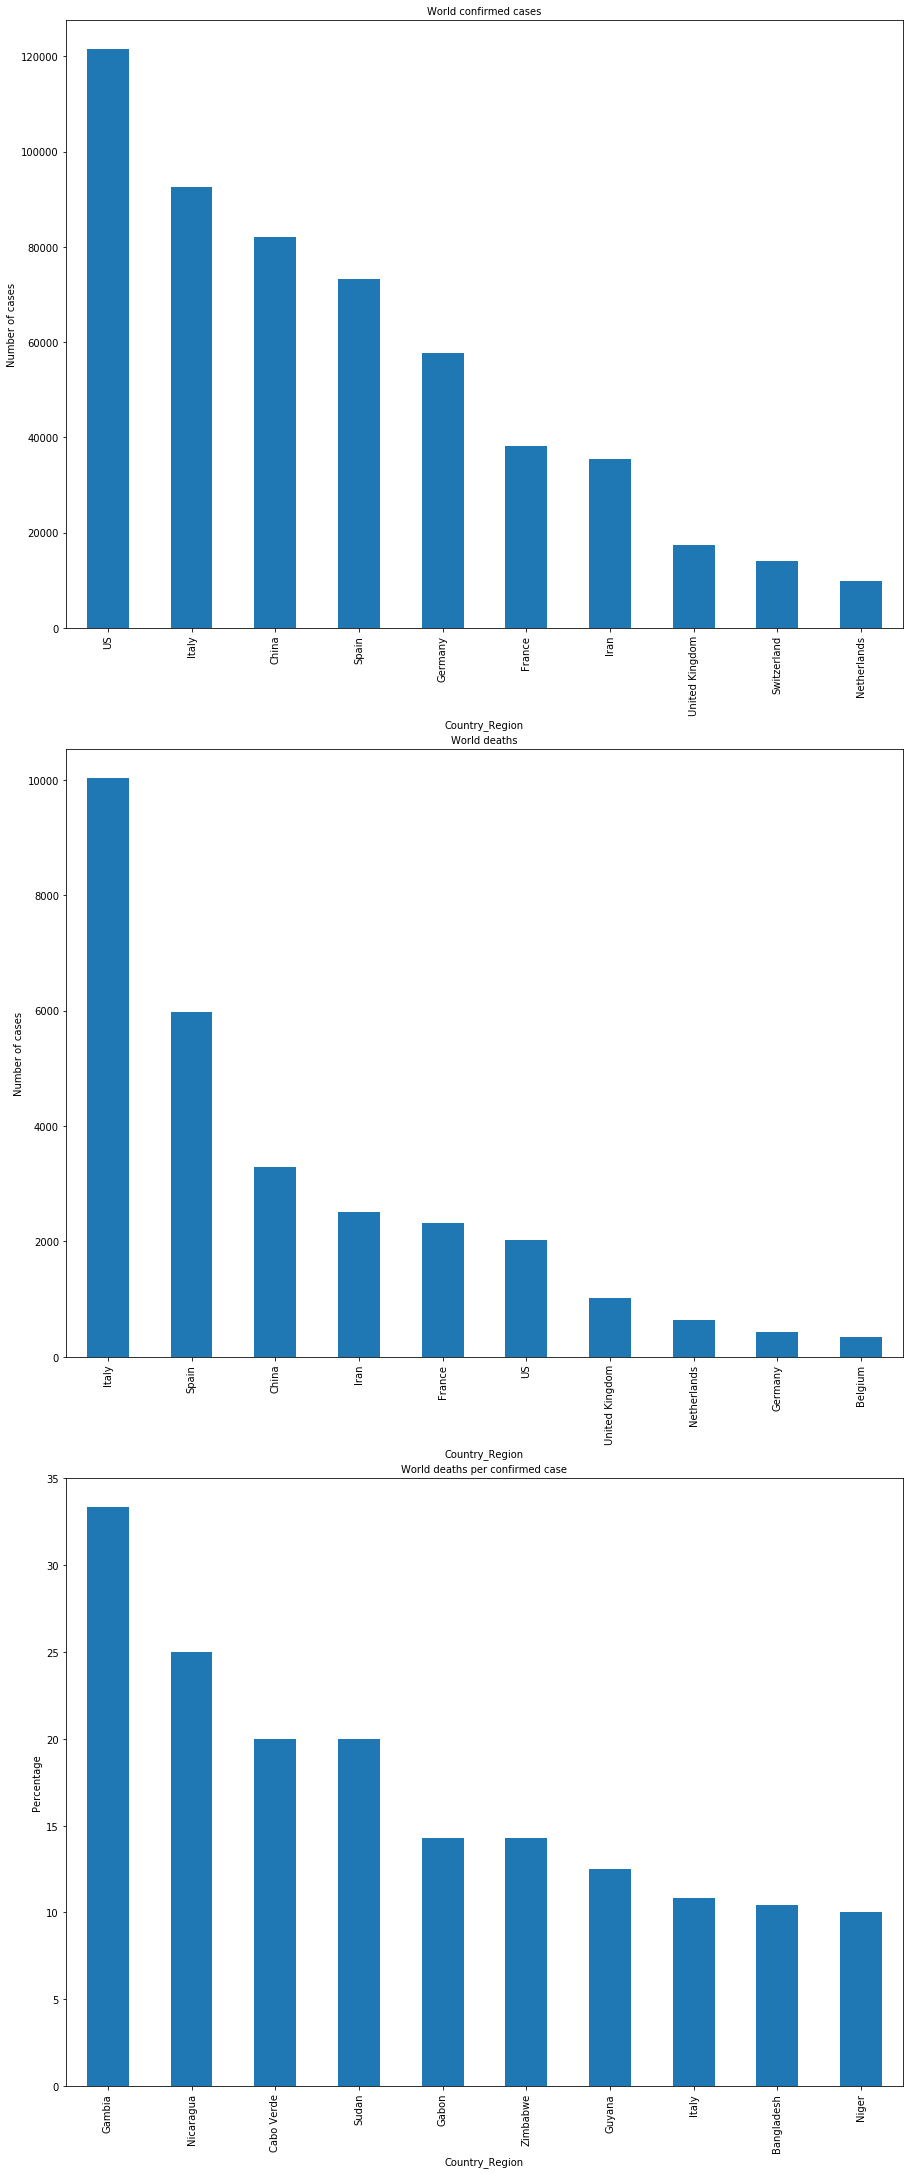

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,38))
data_by_country_confirm.sort_values(by=[('Confirmed', 'sum')],ascending=False)[('Confirmed','sum')][:10].plot.bar(ax=ax1)
ax1.set_title("World confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
data_by_country_deaths.sort_values(by=[('Deaths', 'sum')],ascending=False)[('Deaths','sum')][:10].plot.bar(ax=ax2)
ax2.set_title("World deaths", size=10)
ax2.set_ylabel("Number of cases", size=10)
perc_deaths.sort_values(ascending = False)[:10].plot.bar(ax=ax3)
ax3.set_title("World deaths per confirmed case", size=10)
ax3.set_ylabel("Percentage", size=10)
plt.show()

## 5. Analogy<br><br>&nbsp;

# 5.1 Simple Maths Prerequiste:

#### Exponential Growth : 

    Exponential growth is a specific way that a quantity may increase over time. It occurs when the instantaneous rate of change (that is, the derivative) of a quantity with respect to time is proportional to the quantity itself. Described as a function, a quantity undergoing exponential growth is an exponential function of time, that is, the variable representing time is the exponent (in contrast to other types of growth, such as quadratic growth).
    
   \begin{align}
    x_{t}=x_{0}(1+r)^{t}
    \end{align}
</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Exponential.svg/1024px-Exponential.svg.png" height="420" width="420">

    But an interesting fact about exponential growth is that, no growth is exponential in real terms. They are, what is called early stages of a logarithmic growth. Which in layman terms means that, with time, the rate of growth decreases, and as it is famously used these days, "The curve will get flattened".
  
 \begin{align}
    y=C.log{x}
    \end{align}
</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Log.svg/800px-Log.svg.png" height="420" width="420">


### Growth Rate :
    It is given as the rate of change for a time frame upon the change for the previous time frame.
    
\begin{align}
{g} & = \frac{N_d}{N_{d-1}} \\
\end{align}

    It basically is the ratio of change of infected people on the day to the same in the preceeding day.

# 5.2. China: A Case Study
    So far, China has made a successful strive at getting a hold of situation. To understand this, let's take a look at the available data.

In [11]:
ts_c_china = ts_c[ts_c['Country/Region'] == 'China'].sum(axis=0)[4:].to_numpy()
ts_d_china = ts_d[ts_d['Country/Region'] == 'China'].sum(axis=0)[4:].to_numpy()
ts_r_china = ts_r[ts_r['Country/Region'] == 'China'].sum(axis=0)[4:].to_numpy()
dates = ts_c.columns[4:]
ts_china = pd.DataFrame(np.vstack([ts_c_china,ts_d_china,ts_r_china]),columns=dates)
ts_china = pd.DataFrame(['Confirmed','Death','Recovery'],columns=['Status']).join(ts_china)

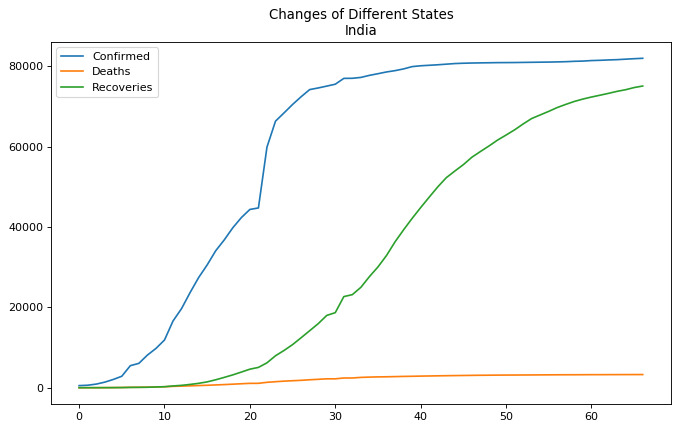

In [12]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(67),ts_c_china.reshape(67,))
plt.plot(ts_d_china.reshape(67,))
plt.plot(ts_r_china.reshape(67,))
plt.title("Changes of Different States\nIndia")
plt.legend(['Confirmed','Deaths','Recoveries'])
plt.show()


    As visible in the graph, initially there is a huge rate of growth in the Confirmed cases, indicating the fast spread of the disease. In fact around the 25th day or so, it can be seen that there is a sharp increase in the rate of growth, resulting in more number of cases as days pass, but nearing 35th day, there is a dip in the rate of growth, after which the growth becomes constant or zero, i.e increase in numbers slow down. The growth can't become negative, as the number of people who died or were tested positive can't undo it, hence the numbers won't deduce, but they can be left stable. So, our goal is to stop the number of confirmed cases from rising any further, for which we'll have to get the rate of growth as close to 1 as possible. To do so, we need to do the following:
    
We need:

\begin{align}
x_{t}=x_{t-1}
\end{align}
To get this:
    
\begin{align}
\frac{(1+r)^{t}}{(1+r)^{t-1}}  & = 1 \\
(1+r) & = 1 \\
r & = 0
\end{align}

# 5.3. India : The Analogy

In [13]:
ts_c_ind = ts_c[ts_c['Country/Region'] == 'India'].iloc[:,4:].to_numpy()
ts_d_ind = ts_d[ts_d['Country/Region'] == 'India'].iloc[:,4:].to_numpy()
ts_r_ind = ts_r[ts_r['Country/Region'] == 'India'].iloc[:,4:].to_numpy()
ts_ind = pd.DataFrame(np.vstack([ts_c_ind,ts_d_ind,ts_r_ind]),columns=dates)
ts_ind = pd.DataFrame(['Confirmed','Death','Recovery'],columns=['Status']).join(ts_ind)

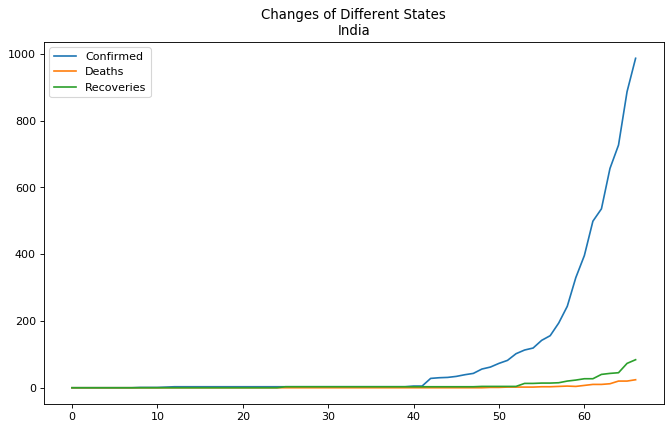

In [14]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(67),ts_c_ind.reshape(67,))
plt.plot(ts_d_ind.reshape(67,))
plt.plot(ts_r_ind.reshape(67,))
plt.title("Changes of Different States\nIndia")
plt.legend(['Confirmed','Deaths','Recoveries'])

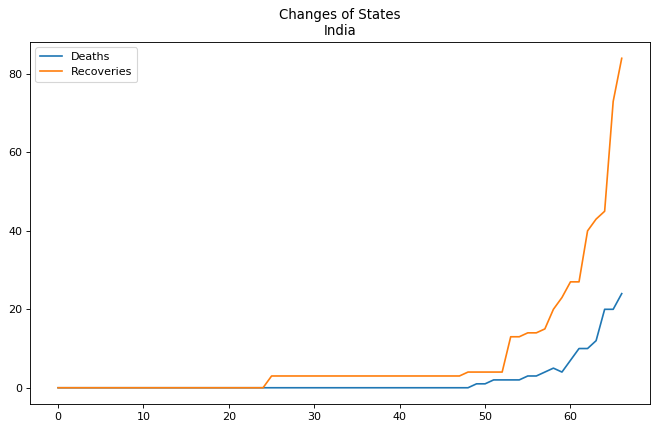

In [15]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(67),ts_d_ind.reshape(67,))
plt.plot(ts_r_ind.reshape(67,))
plt.title("Changes of States\nIndia")
plt.legend(['Deaths','Recoveries'])


    As can be seen the rate of growth of recoveries is growing faster than rate of deaths, meaning that required precautionary measures are being taken as of now, but the question is, are they enough to make the condition stable by stoping further spread of disease. For that analysis, we first have to take a look at the following model:

# 5.4. A Typical SIR Model
<img src='https://www.researchgate.net/profile/C_Macal/publication/224209140/figure/fig1/AS:302881765904406@1449224048529/Typical-SIR-model-solution-showing-progression-of-population-disease-states-for.png' />

    Let's move on to one of the most famous epidemiologic models: SIR.
    SIR is a simple model that considers a population that belongs to one of the following states:

### Susceptible (S).
    The individual hasn't contracted the disease, but she can be infected due to transmisison from infected people
### Infected (I).
    This person has contracted the disease
### Recovered/Deceased (R).
    The disease may lead to one of two destinies: either the person survives, hence developing inmunity to the disease, or the person is deceased.


    This model simpy infers that as time passes for an epidemic or in this case, pandemic, the number of susceptible people decrease, and they turn into affected/infected i.e, known number of cases, which results in either of the case, where either the individual dies or recovers from the disease. For real life scenerio, when the population size is much large, then the total population is not considered, only a sample size of it is taken under consideration, and this sample size consists of let's say, all the people who get tested for the virus, as only out of those many individuals, can there be ones who are either confirmed i.e Infected, or Dead, or Recovered.

# 5.5. Comparision


    Let's look at the plots for India and China, side by side:

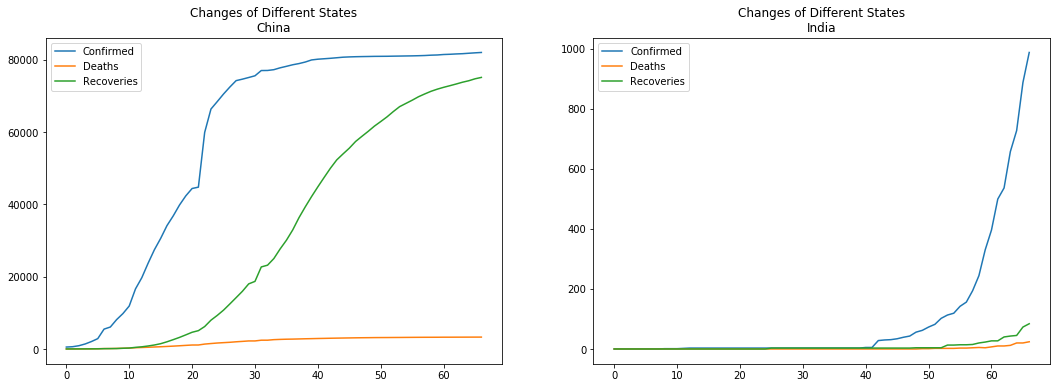

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.plot(np.arange(67),ts_c_china.reshape(67,))
ax1.plot(ts_d_china.reshape(67,))
ax1.plot(ts_r_china.reshape(67,))
ax1.set_title("Changes of Different States\nChina")
ax1.legend(['Confirmed','Deaths','Recoveries'])
ax2.plot(np.arange(67),ts_c_ind.reshape(67,))
ax2.plot(ts_d_ind.reshape(67,))
ax2.plot(ts_r_ind.reshape(67,))
ax2.set_title("Changes of Different States\nIndia")
ax2.legend(['Confirmed','Deaths','Recoveries'])

    China, as visible, has nearly stabalized it's increase in Confirmed cases, or according to SIR model, it's number of Infected cases. It was possible because, China took right measures at the right time, to control the virus from spreading across the country. But for the parts, where it had to stop the disease from spreading across the world, it failed miserably.

    China as of now, is very close to achieve the point at which in the SIR model,the rate of growth of recoveries increase rapidly and the number of recoveries get close to the susceptible, meaning that all the susceptible that would change to infected, would ultimately change to recovered/deceased, but at the same time, the number of susceptible people get close to 0, meaning a very few people would be susceptible to disease, hence that few only will die or have recovery, and hence the spread of the disease would get controlled.


    As for India, it still is in it's initial stages of the disease. Comparing it with the SIR model, it still is in the stage where the number of susceptible people is higher than the number of infected ones. To understand how fast each state is changing, let's consider the growth rate of all of them.

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


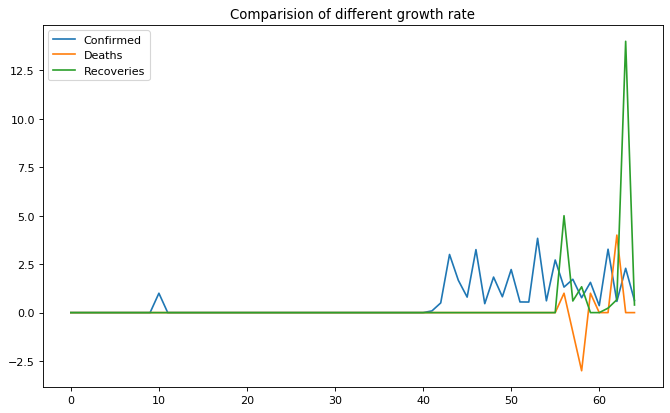

In [17]:
confirm_gr = get_growth_rate(ts_c_ind)
death_gr = get_growth_rate(ts_d_ind)
recovery_gr = get_growth_rate(ts_r_ind)

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(confirm_gr)
plt.plot(death_gr)
plt.plot(recovery_gr)
plt.title("Comparision of different growth rate")
plt.legend(['Confirmed','Deaths','Recoveries'])


    As of now,the rate of death is very close to zero in terms of growth rate, which is a good indication, at the same time, recoveries are spiking high in terms of growth rate, means compared to earlier, recoveries are increasing well, which in turn lands us to a fair conclusion that, the steps that India is taking in correspondance to the status-quo, is having a good impact over the situation, and can soon bring down the casualties and sooner than later, can reduce the susceptible sample of population.
    
    Further, we can setup a predictive model which would help us take decisions that could be taken in order to get the situation under control.